In [2]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

## Basics

In [3]:
arr_1 = np.random.randn(50,4)
df_1 = pd.DataFrame(arr_1 , columns = ['a' , 'b' , 'c' , 'd'])
df_1.head()

,a,b,c,d
0,-1.261436,0.852881,-0.596678,0.138682
1,0.848631,0.452084,0.686992,0.194409
2,0.476949,0.389868,1.727738,1.677095
3,-0.876946,-0.761575,-1.281053,0.405926
4,-0.648454,0.007756,1.168922,0.555208


<AxesSubplot:>

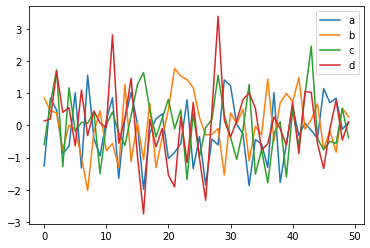

In [4]:
df_1.plot()

In [5]:
df_1.iplot()

In [6]:
## Line Plots

In [7]:
import plotly.graph_objects as go

In [12]:
df_stocks = px.data.stocks()
px.line(df_stocks , x = 'date' , y = 'GOOG', labels = {
    'x' : 'Date',
    'y' : 'Price'
})
px.line(df_stocks , x = 'date' , y = ['GOOG' , 'AAPL'], labels = {
    'x' : 'Date',
    'y' : 'Price'
} , title = 'Apple Vs Google')


In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_stocks.date , y = df_stocks.AAPL , mode = 'lines' , name = 'Apple'))
fig.add_trace(go.Scatter(x = df_stocks.date , y = df_stocks.AMZN , mode = 'lines+markers' , name ='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG, 
                        mode='lines+markers', name='Google',
                        line=dict(color='firebrick', width=2, dash='dashdot')))
fig.update_layout(
    # Shows gray line without grid, styling fonts, linewidths and more
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    # Turn off everything on y axis
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)


## Bar Charts 

In [37]:
df_us = px.data.gapminder().query("country == 'United States'")
px.bar(df_us, x='year', y='pop')
df_tips = px.data.tips()
px.bar(df_tips, x='day', y='tip', color='sex', title='Tips by Sex on Each Day',
      labels={'tip': 'Tip Amount', 'day': 'Day of the Week'})
# Place bars next to each other
px.bar(df_tips, x="sex", y="total_bill",
             color='smoker', barmode='group')

# Display pop data for countries in Europe in 2007 greater than 2000000
df_europe = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df_europe, y='pop', x='country', text='pop', color='country')

# Put bar total value above bars with 2 values of precision
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig.update_layout(uniformtext_minsize=8)


# Rotate labels 45 degrees
fig.update_layout(xaxis_tickangle=-45)

